<a href="https://colab.research.google.com/github/T3mofey/rotat/blob/main/integral_plus_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from math import pi, sin, sqrt
from scipy import integrate

def I_of_s(s, epsabs=1e-10, epsrel=1e-10):
    if s >= pi:
        return 0.0
    f = lambda x: sqrt(x*x - s*s) * sin(x)
    # интегрируем с нижним пределом s (особенность интегрируемая)
    res, err = integrate.quad(f, s, pi, epsabs=epsabs, epsrel=epsrel, limit=200)
    return res

def dI_of_s(s, epsabs=1e-10, epsrel=1e-10):
    if s >= pi:
        return 0.0
    g = lambda x: -s * sin(x) / sqrt(x*x - s*s)
    res, err = integrate.quad(g, s, pi, epsabs=epsabs, epsrel=epsrel, limit=400)
    return res

# табулируем
N = 1000
s_values = np.linspace(0.0, pi*(1-1e-12), N)   # не включаем точный pi
with open("table_no_change.txt", "w") as f:
    f.write("# s  I(s)  dI_ds\n")
    for s in s_values:
        try:
            Ival = I_of_s(s)
            dIval = dI_of_s(s)
        except Exception as e:
            Ival = float('nan')
            dIval = float('nan')
        f.write(f"{s:.12e} {Ival:.15e} {dIval:.15e}\n")
    # явно добавить точку s=pi
    f.write(f"{pi:.12e} 0.0 0.0\n")


In [3]:
from google.colab import files
files.download("table_no_change.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

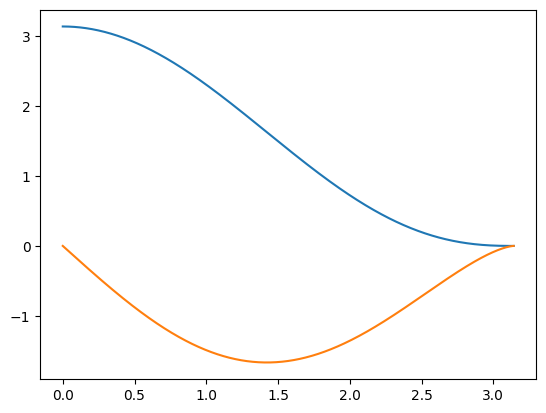

In [7]:
import matplotlib.pyplot as plt
data = np.loadtxt("table_no_change.txt")
x = data[:,0]
y = data[:,1]
z = data[:,2]
plt.plot(x,y,label="I(x)")
plt.plot(x,z, label = "I'(x)")
plt.show()